## Chapter 5

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 5.9

In [38]:
R = 1. # variance of observed value
B = 1./2 # variance of prior
dobs = 2. # mean of observed value
x0 = -2. # mean of prior

dx = 0.00001
xgrid = np.arange(-4.,1.+dx,dx)

prior = 1./np.sqrt(2. * np.pi * B) * np.exp(-(xgrid-x0)**2 / (2. * B))
prior = prior/np.sum(prior)/dx

# non-linear forward map
def obsgf(xgrid):
    return 7./12 * xgrid**3 - 7./2 * xgrid**2 + 8 * xgrid

obsg = obsgf(xgrid)
lik = 1./np.sqrt(2. * np.pi * R) * np.exp(-(obsg - dobs)**2 / (2. * R))
# lik = lik / np.sum(lik) / dx
post = lik * prior / np.sum(lik * prior) / dx

# posterior mean
mean_post = np.sum(post * xgrid * dx)
var_post = np.sum(post * (xgrid - mean_post)**2 * dx)
print("posterior mean = %.4f" %mean_post)
print("posterior var = %.4f" %var_post)

# posterior median
h = 0
i = 0
while h <= .5:
    h += post[i] * dx
    i += 1

print("posterior median = %.4f" %xgrid[i])

# maximum posterior estimator (global maximum!) over the grid
i = 0 
while post[i] <= post[i+1]:
    i += 1

print("posterior MAP (over grid) = %.4f" %xgrid[i])

# maximum posterior estimator (Newton method)
mapost = mean_post
eps = 1.

while eps > 1e-8:
    obsg = obsgf(mapost)
    
    # f is the negative exponent of eqn (5.7).
    # finding argument for the smallest f yields the maxima of the pdf (our goal!)
    f = (mapost-x0)**2 / (2. * B) + (obsg - dobs)**2 / (2. ** R)
    Df = 1./B*(mapost-x0) + 1./R * (obsg - dobs) * (7./4 * mapost**2 - 7. * mapost + 8)
    
    alpha = 1.
    t = 0.
    
    # find a proper step-size to ensure decreasing f's.
    while t < .5:
        mapn = mapost - alpha * Df
        alpha /= 2.
        
        obsg = obsgf(mapn)
        fn = (mapn-x0)**2 / (2. * B) + (obsg - dobs)**2 / (2. ** R)
        
        if fn <= f:
            t = 1.
    
    eps = np.abs(mapn-mapost)
    mapost= mapn
    
print("posterior MAP (Newton method) = %.4f" %xgrid[i])

posterior mean = 0.2095
posterior var = 0.0211
posterior median = 0.2006
posterior MAP (over grid) = 0.1837
posterior MAP (Newton method) = 0.1837


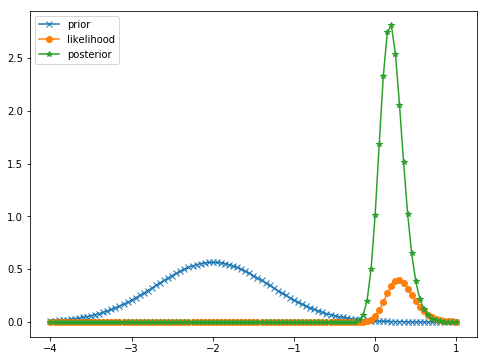

In [32]:
dx = 0.05
xgrid = np.arange(-4.,1.+dx,dx)
prior = 1./np.sqrt(2. * np.pi * B) * np.exp(-(xgrid-x0)**2 / (2. * B))
prior = prior/np.sum(prior)/dx

# non-linear forward map
obsg = 7./12 * xgrid**3 - 7./2 * xgrid**2 + 8 * xgrid
lik = 1./np.sqrt(2. * np.pi * R) * np.exp(-(obsg - dobs)**2 / (2. * R))
# lik = lik / np.sum(lik) / dx
post = lik * prior / np.sum(lik * prior) / dx

fig0 = plt.figure(figsize=(8,6))
plt.plot(xgrid,prior, 'x-', label="prior")
plt.plot(xgrid,lik, '-o', label="likelihood")
plt.plot(xgrid,post, '-*', label="posterior")
plt.legend()
plt.show()